In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from math import sqrt
import statsmodels.api as smf
# import pandas_profiling as pp
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot
import statsmodels.formula.api as sm

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt 


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\DS Project\Forecast Gold Prices\Gold_data (1).csv",index_col=0, parse_dates=True)
df

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [5]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [6]:
df.isna().sum()

price    0
dtype: int64

In [7]:
df.duplicated().sum()

306

In [8]:
df.duplicated()

date
2016-01-01    False
2016-01-02    False
2016-01-03    False
2016-01-04    False
2016-01-05    False
              ...  
2021-12-17    False
2021-12-18    False
2021-12-19     True
2021-12-20    False
2021-12-21    False
Length: 2182, dtype: bool

In [9]:
data = pd.read_csv(r"D:\DS Project\Forecast Gold Prices\Gold_data (1).csv")


In [10]:
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [11]:
data.duplicated().sum()

0

In [12]:
print("Year starts from {} to {}".format(data.date[0],data.date.iloc[-1]))

Year starts from 2016-01-01 to 2021-12-21


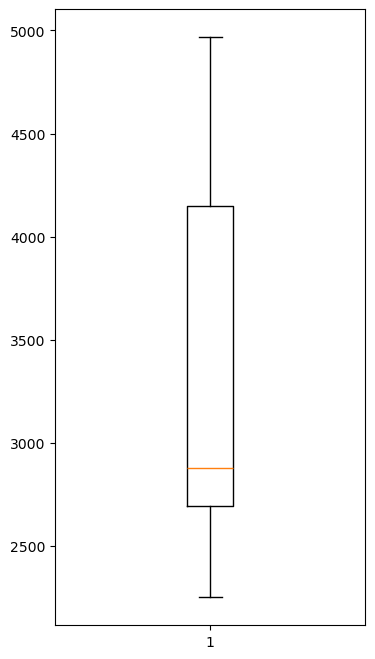

In [13]:
plt.figure(figsize=(4,8))
plt.boxplot(data.price)
plt.show()

<Axes: >

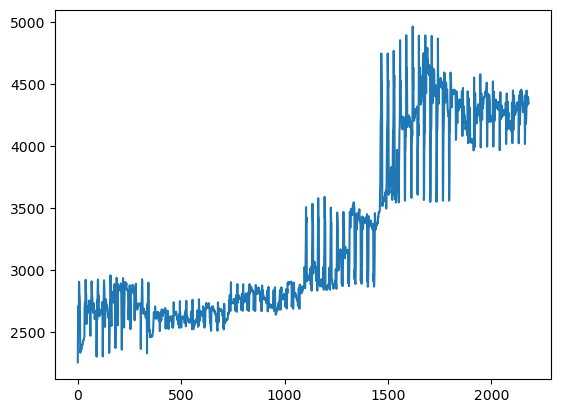

In [14]:
data['price'].plot()

In [15]:
data['date']=pd.to_datetime(data.date)

In [16]:
data['month'] = data.date.dt.strftime('%b')
data['year'] = data.date.dt.strftime('%Y')
data['quarter'] = data['date'].dt.quarter
data['day']=pd.to_datetime(data.date).dt.strftime('%d')
data['day_name'] = data['date'].dt.day_name()


In [17]:
data

,date,price,month,year,quarter,day,day_name
0,2016-01-01,2252.60,Jan,2016,1,01,Friday
1,2016-01-02,2454.50,Jan,2016,1,02,Saturday
2,2016-01-03,2708.10,Jan,2016,1,03,Sunday
3,2016-01-04,2577.80,Jan,2016,1,04,Monday
4,2016-01-05,2597.75,Jan,2016,1,05,Tuesday
...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,4,17,Friday
2178,2021-12-18,4389.50,Dec,2021,4,18,Saturday
2179,2021-12-19,4389.50,Dec,2021,4,19,Sunday
2180,2021-12-20,4354.10,Dec,2021,4,20,Monday


In [18]:
data[['month']]=data[['month']].astype('str')
data[['year']]=data[['year']].astype(int)
data[['quarter']]=data[['quarter']].astype(int)
data[['day']]=data[['day']].astype(int)
data[['day_name']]=data[['day_name']].astype(str)

In [19]:
data

,date,price,month,year,quarter,day,day_name
0,2016-01-01,2252.60,Jan,2016,1,1,Friday
1,2016-01-02,2454.50,Jan,2016,1,2,Saturday
2,2016-01-03,2708.10,Jan,2016,1,3,Sunday
3,2016-01-04,2577.80,Jan,2016,1,4,Monday
4,2016-01-05,2597.75,Jan,2016,1,5,Tuesday
...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,4,17,Friday
2178,2021-12-18,4389.50,Dec,2021,4,18,Saturday
2179,2021-12-19,4389.50,Dec,2021,4,19,Sunday
2180,2021-12-20,4354.10,Dec,2021,4,20,Monday


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2182 non-null   datetime64[ns]
 1   price     2182 non-null   float64       
 2   month     2182 non-null   object        
 3   year      2182 non-null   int32         
 4   quarter   2182 non-null   int32         
 5   day       2182 non-null   int32         
 6   day_name  2182 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(3), object(2)
memory usage: 93.9+ KB


In [21]:
data.describe()

,date,price,year,quarter,day
count,2182,2182.000000,2182.000000,2182.000000,2182.000000
mean,2018-12-26 12:00:00.000000256,3284.450046,2018.488084,2.501375,15.683318
min,2016-01-01 00:00:00,2252.600000,2016.000000,1.000000,1.000000
25%,2017-06-29 06:00:00,2697.020000,2017.000000,2.000000,8.000000
50%,2018-12-26 12:00:00,2879.800000,2018.000000,3.000000,16.000000
75%,2020-06-23 18:00:00,4147.325000,2020.000000,3.000000,23.000000
max,2021-12-21 00:00:00,4966.300000,2021.000000,4.000000,31.000000
std,NaN,719.564434,1.704054,1.115416,8.791074


In [22]:
data['change'] = data['price'].pct_change()
data['difference'] = data['price'].diff()

In [23]:
data

,date,price,month,year,quarter,day,day_name,change,difference
0,2016-01-01,2252.60,Jan,2016,1,1,Friday,NaN,NaN
1,2016-01-02,2454.50,Jan,2016,1,2,Saturday,0.089630,201.90
2,2016-01-03,2708.10,Jan,2016,1,3,Sunday,0.103320,253.60
3,2016-01-04,2577.80,Jan,2016,1,4,Monday,-0.048115,-130.30
4,2016-01-05,2597.75,Jan,2016,1,5,Tuesday,0.007739,19.95
...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,Dec,2021,4,17,Friday,-0.001227,-5.40
2178,2021-12-18,4389.50,Dec,2021,4,18,Saturday,-0.001115,-4.90
2179,2021-12-19,4389.50,Dec,2021,4,19,Sunday,0.000000,0.00
2180,2021-12-20,4354.10,Dec,2021,4,20,Monday,-0.008065,-35.40


In [24]:
df_year = data[['price','year']].groupby(by='year').mean().reset_index()

In [25]:
df_year

,year,price
0,2016,2690.614162
1,2017,2626.676484
2,2018,2781.938082
3,2019,3150.210685
4,2020,4216.378689
5,2021,4266.871549


Text(0, 0.5, 'Price')

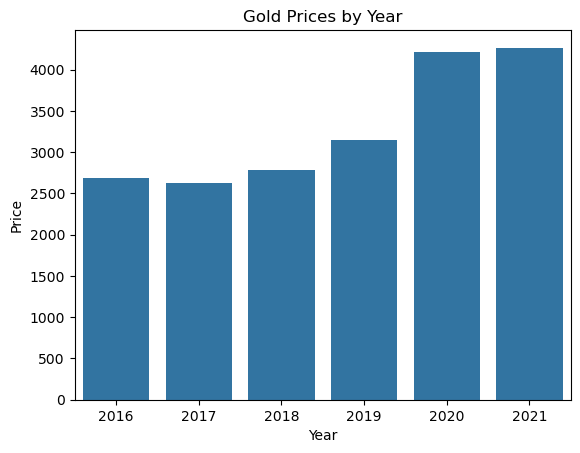

In [26]:
sns.barplot(x='year',y='price',data = df_year)
plt.title('Gold Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')

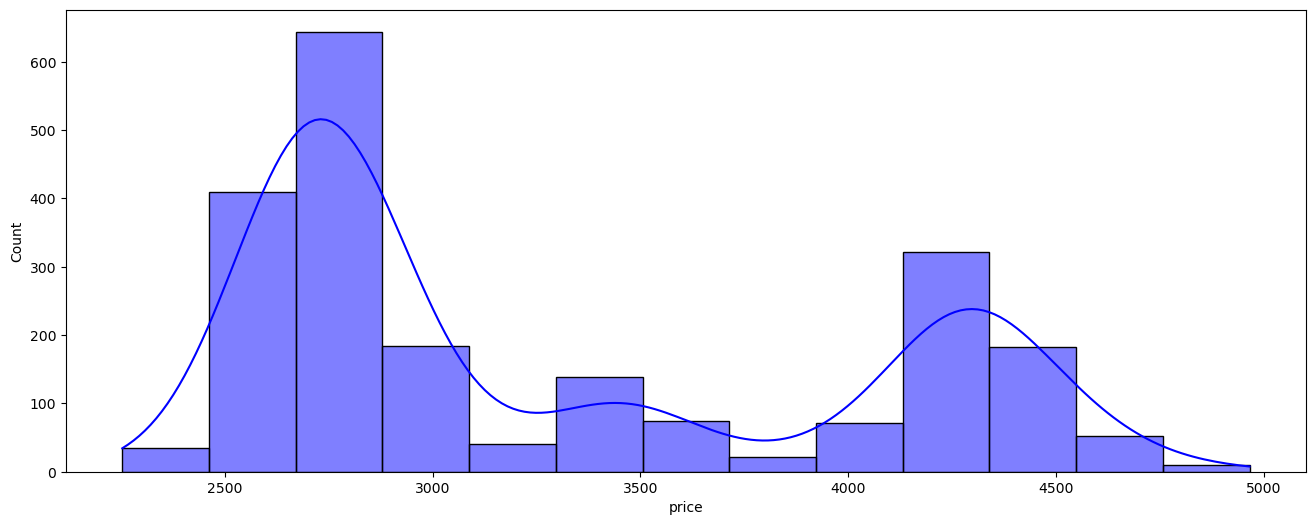

In [27]:
plt.subplots(figsize=(16,6))
sns.histplot(data=data,x='price',kde=True,color='blue')
plt.show()

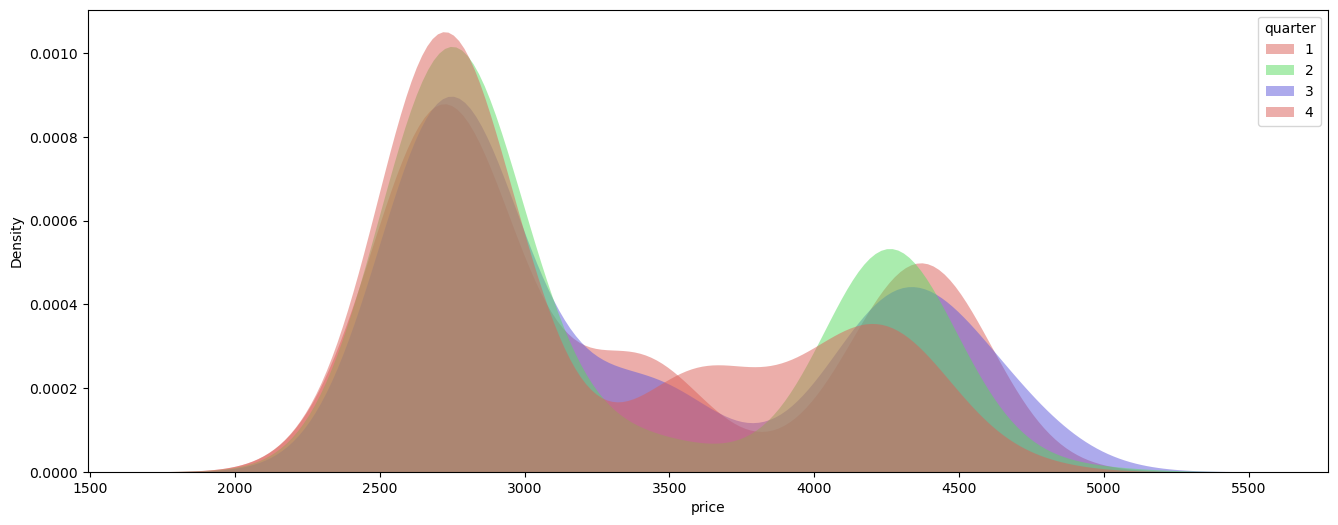

In [28]:
plt.subplots(figsize=(16,6))
sns.kdeplot(data=data, x="price", hue="quarter",fill=True, common_norm=False, palette="hls", alpha=.5, linewidth=0,)
plt.show()

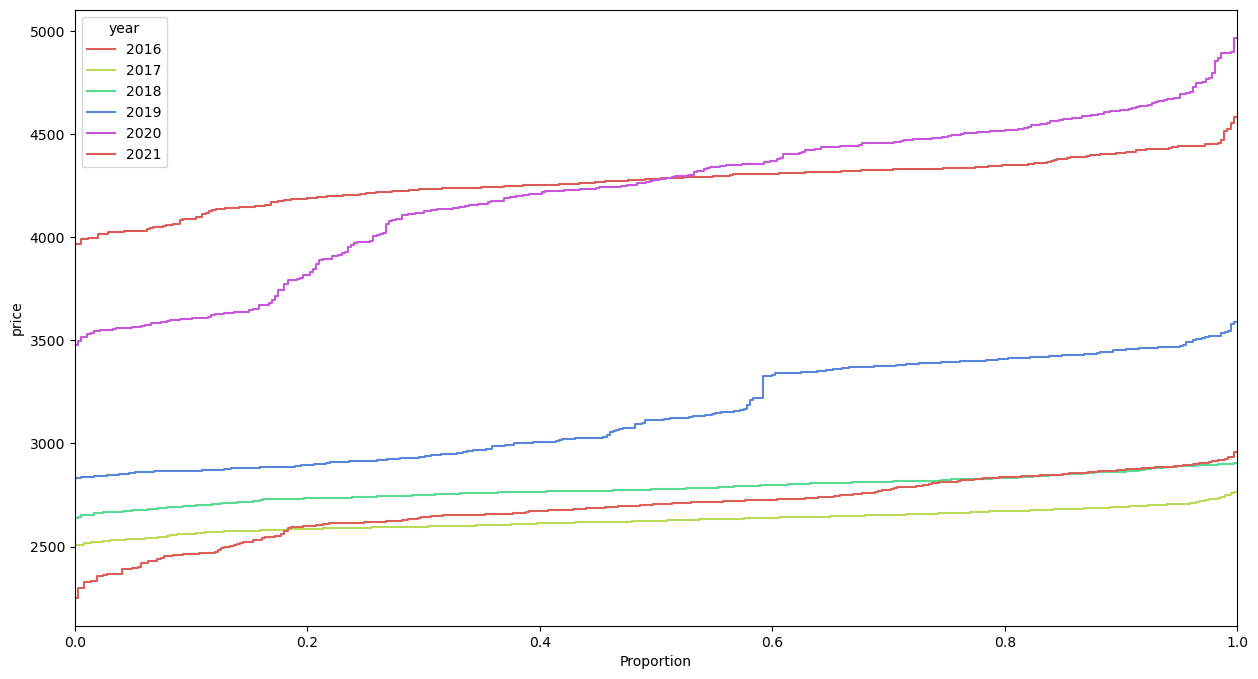

In [29]:
plt.subplots(figsize=(15,8))
sns.ecdfplot(data=data, y="price",hue='year',palette="hls")
plt.show()

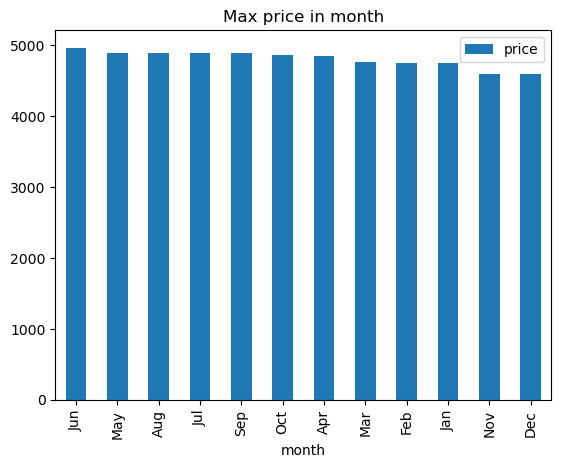

In [30]:
dfm=data.groupby(['month']).max().sort_values(by='price',ascending=False).plot.bar(y='price',title='Max price in month')

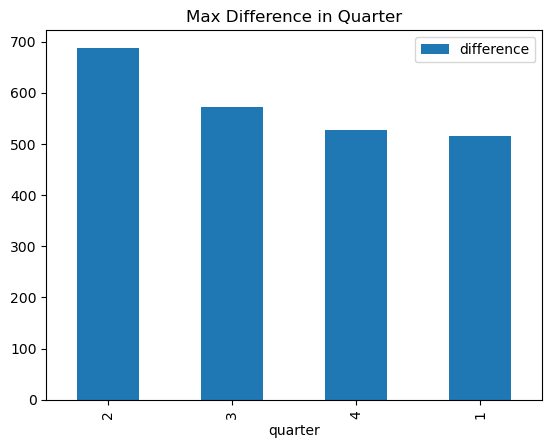

In [31]:
dfq=data.groupby(['quarter']).max().sort_values(by='price',ascending=False).plot.bar(y='difference',title='Max Difference in Quarter')

<Axes: xlabel='year', ylabel='price'>

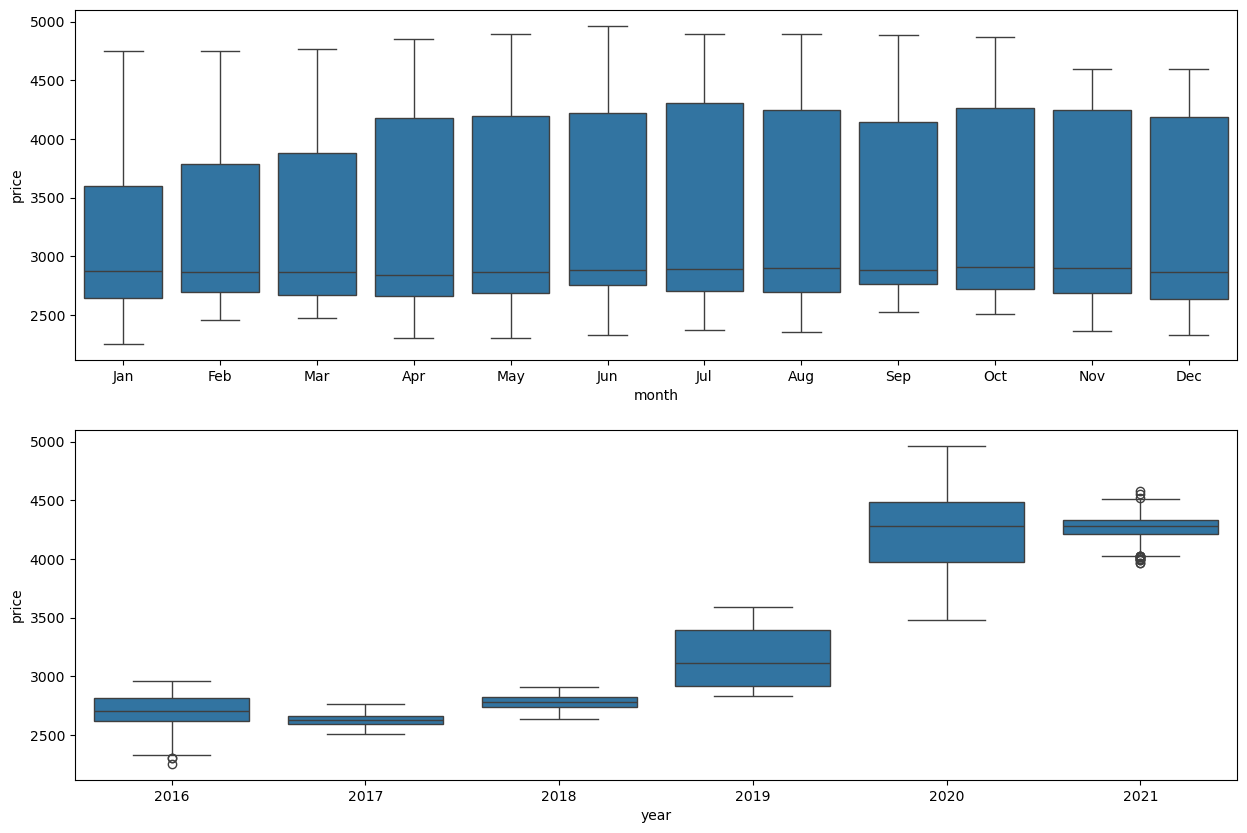

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x='month',y="price",data=data)
plt.subplot(212)
sns.boxplot(x='year',y="price",data=data)


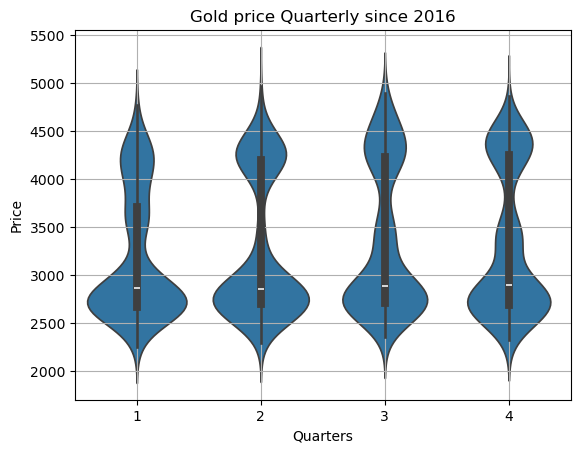

In [33]:
sns.violinplot(x='quarter',y="price",data=data)
plt.title("Gold price Quarterly since 2016")
plt.xlabel("Quarters")
plt.ylabel("Price")
plt.grid()

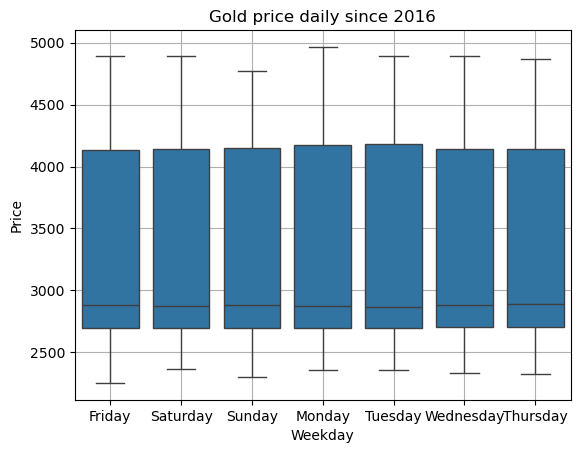

In [34]:
sns.boxplot(x='day_name',y="price",data=data)
plt.title("Gold price daily since 2016")
plt.xlabel("Weekday")
plt.ylabel("Price")
plt.grid()

In [35]:
dfd=data[['day','price']]
dfd.set_index('day',inplace=True)

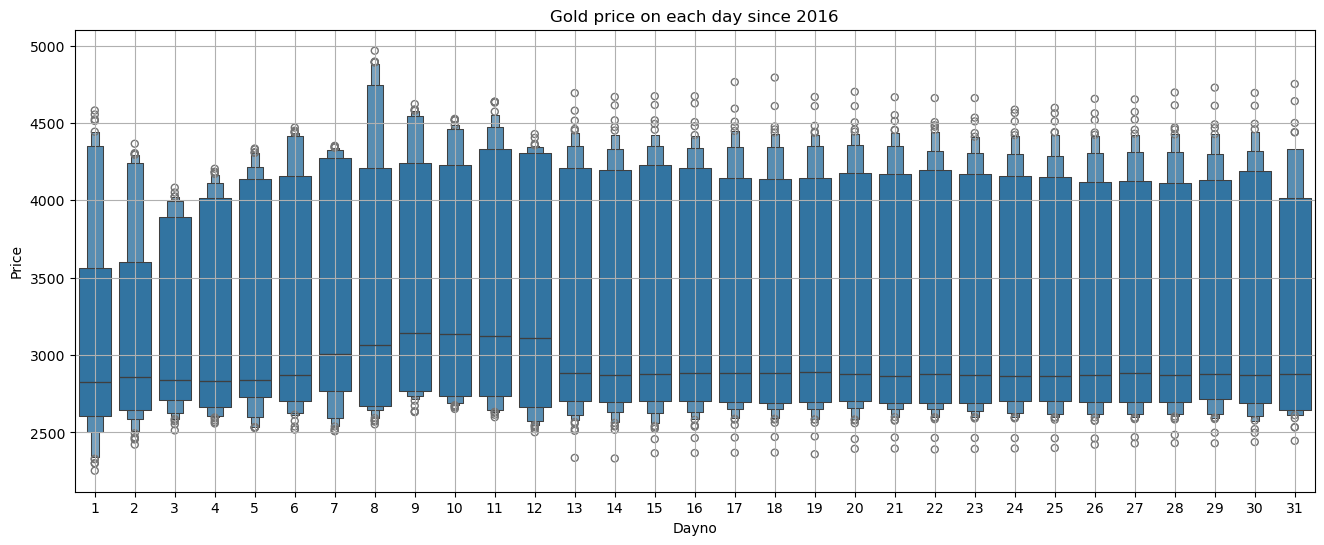

In [36]:
plt.subplots(figsize=(16,6))
sns.boxenplot(x = dfd.index,y = dfd.price)
plt.title("Gold price on each day since 2016")
plt.xlabel("Dayno")
plt.ylabel("Price")
plt.grid();

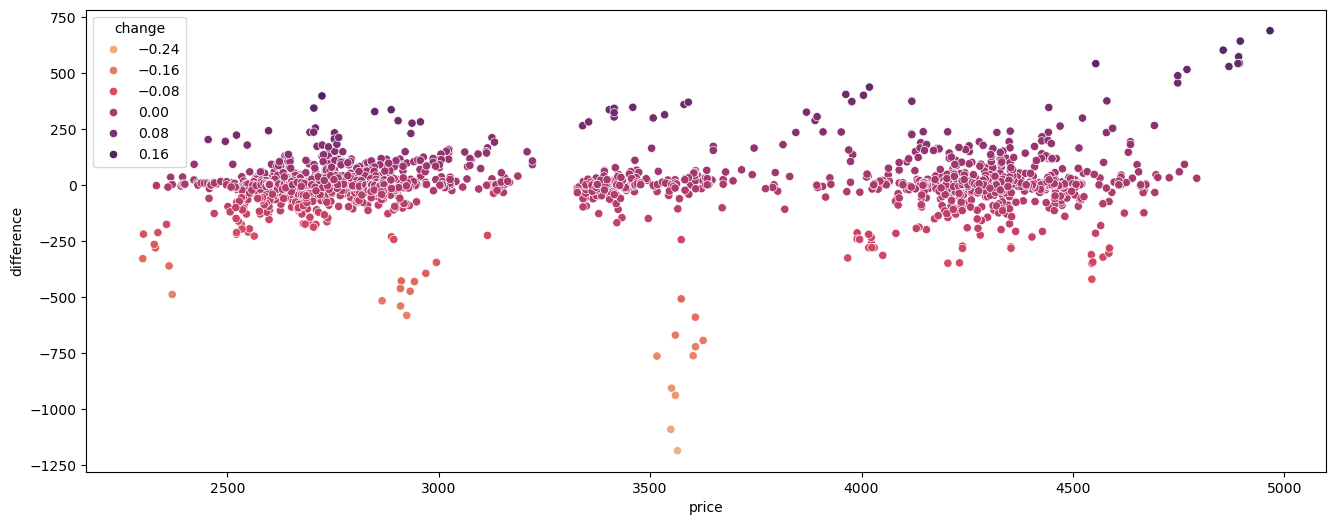

In [37]:
plt.subplots(figsize=(16,6))
sns.scatterplot(x='price',y='difference',hue='change',palette="flare",data=data)
plt.show()

<Axes: xlabel='month', ylabel='year'>

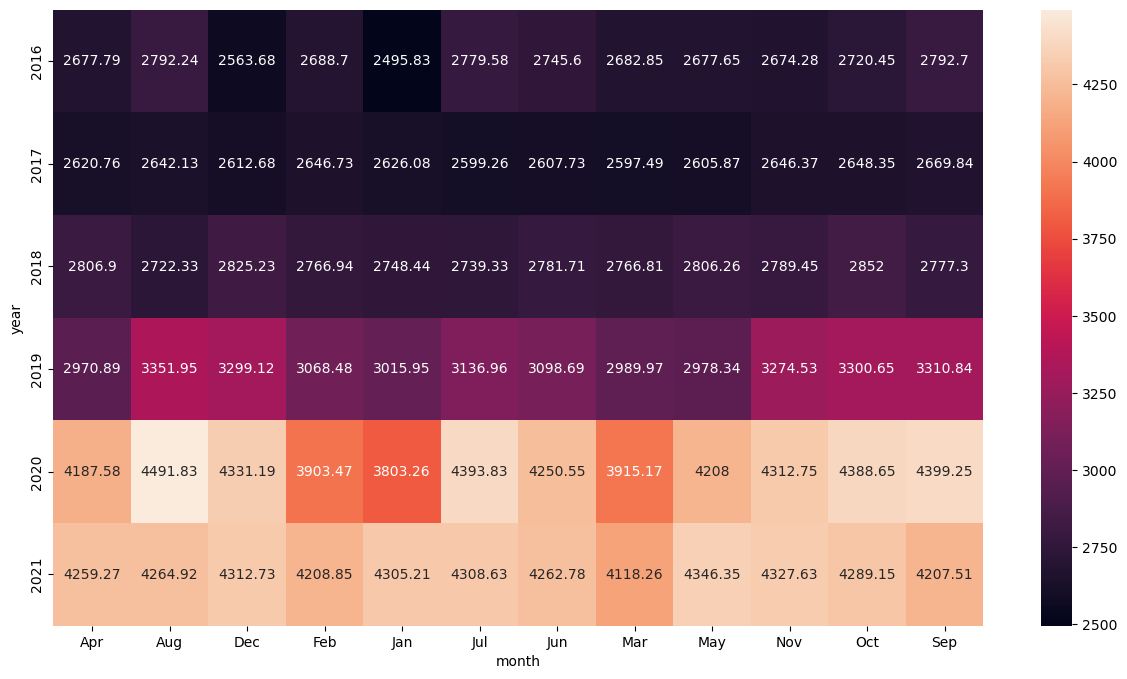

In [38]:
plt.figure(figsize=(15,8))
y_m=pd.pivot_table(data=data,values='price',index='year',columns='month',aggfunc="mean",fill_value=0)
sns.heatmap(y_m,annot=True,fmt='g')

<Axes: xlabel='month', ylabel='price'>

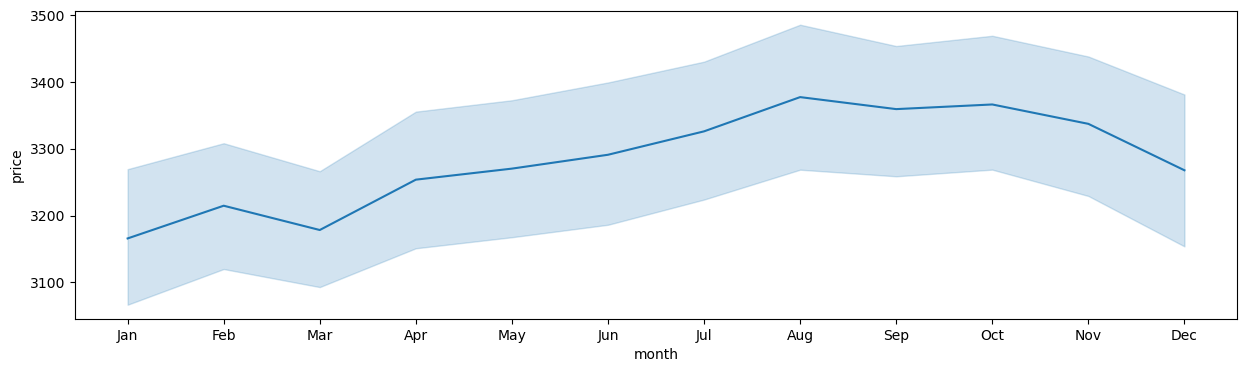

In [39]:
plt.figure(figsize=(15,4))
sns.lineplot(x='month',y="price",data=data)

<Axes: xlabel='year', ylabel='price'>

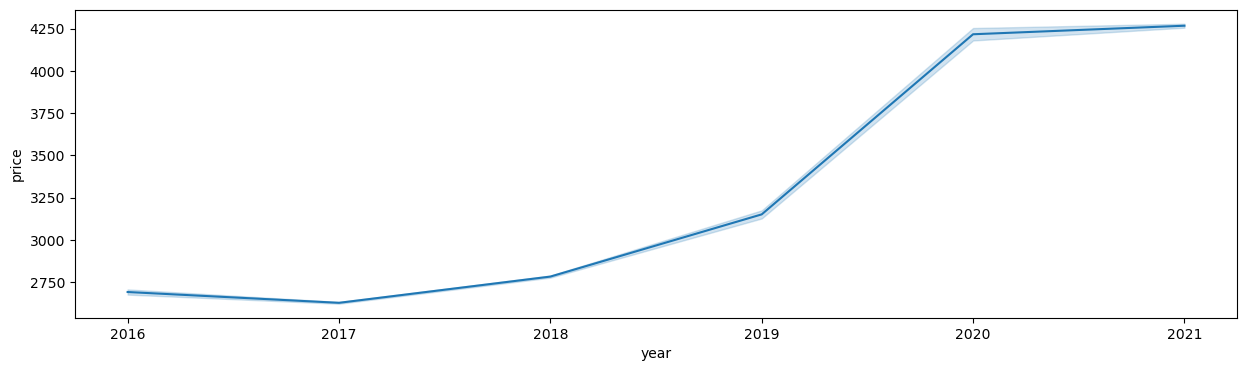

In [40]:
plt.figure(figsize=(15,4))
sns.lineplot(x='year',y="price",data=data)

<Axes: xlabel='quarter', ylabel='price'>

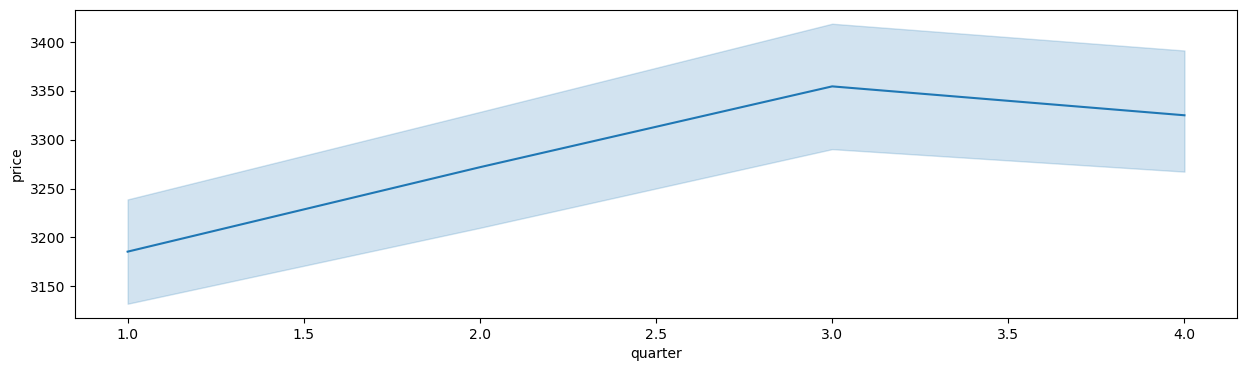

In [41]:
plt.figure(figsize=(15,4))
sns.lineplot(x='quarter',y="price",data=data)

<Axes: xlabel='day_name', ylabel='price'>

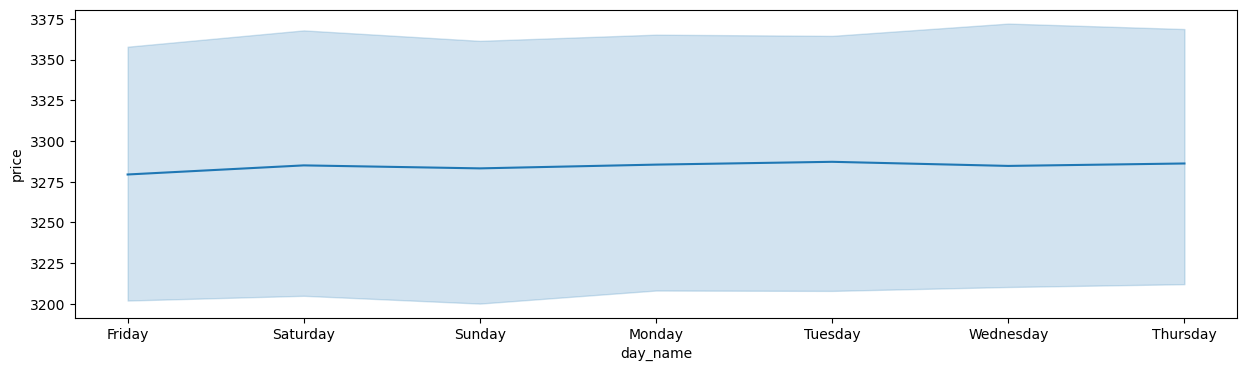

In [42]:
plt.figure(figsize=(15,4))
sns.lineplot(x='day_name',y="price",data=data)

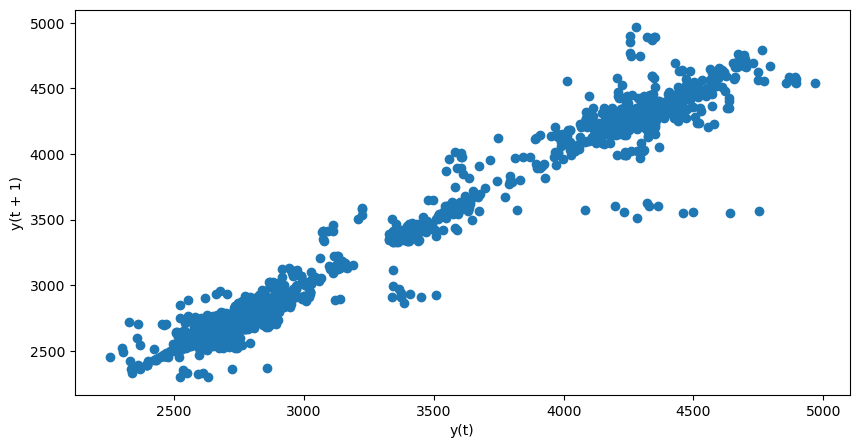

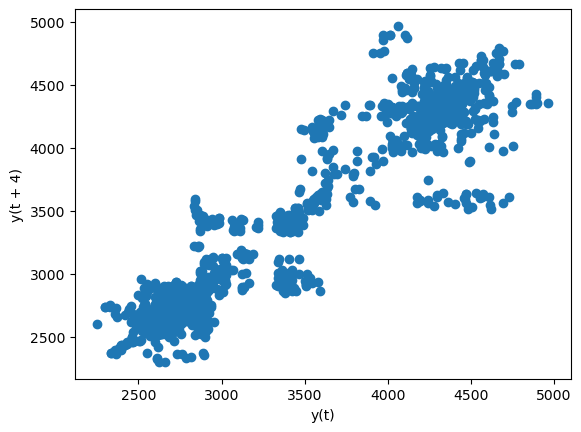

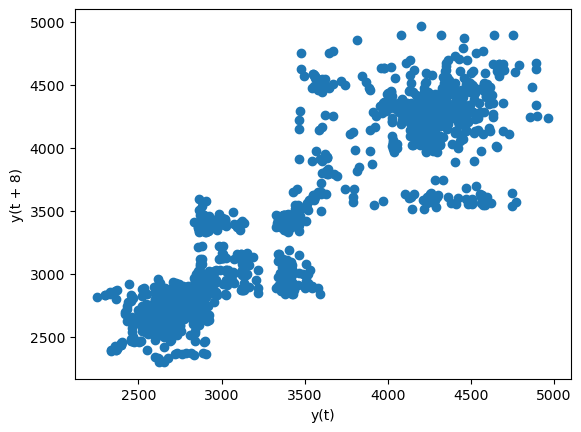

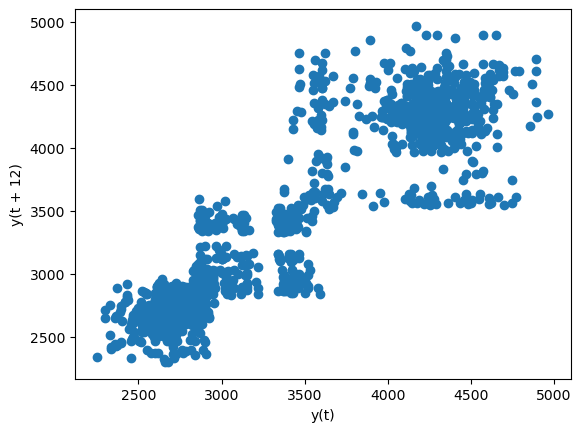

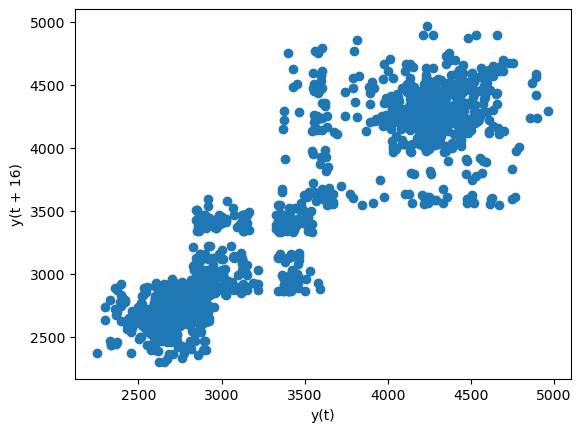

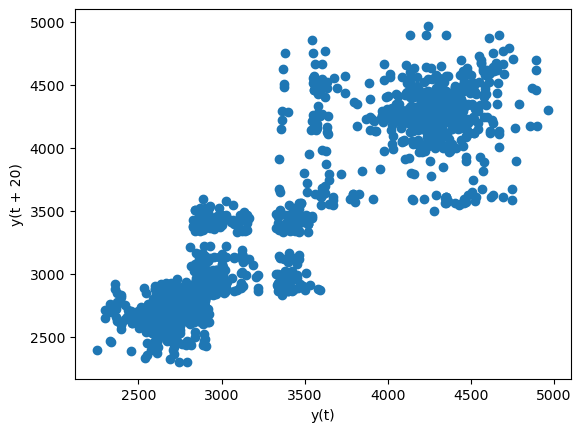

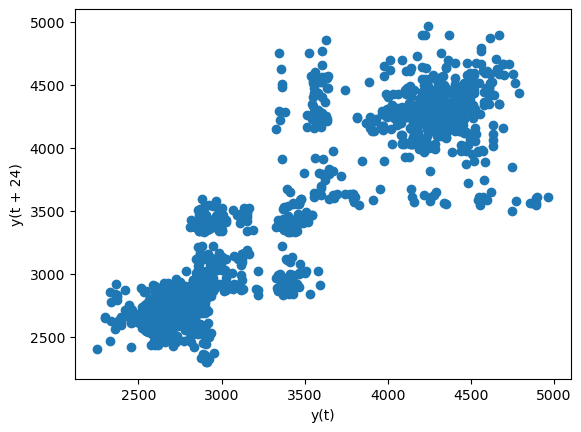

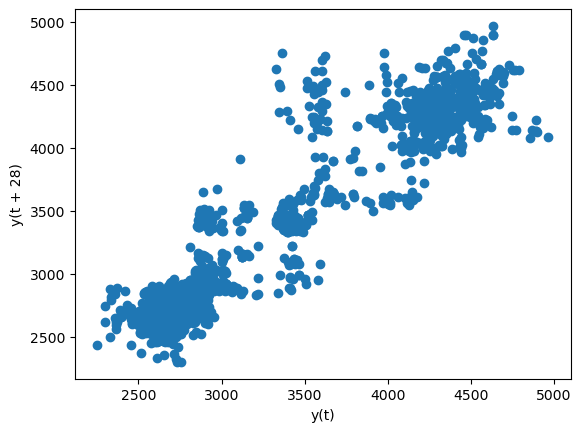

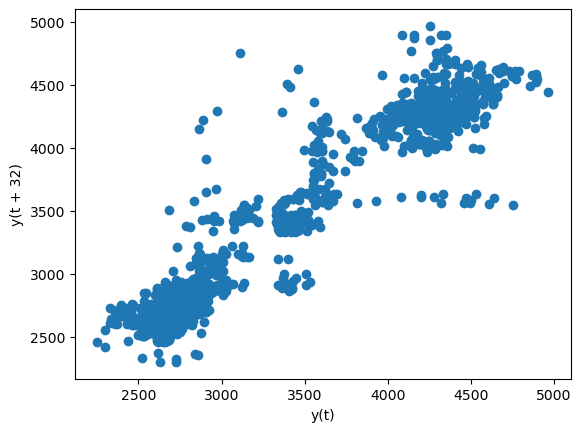

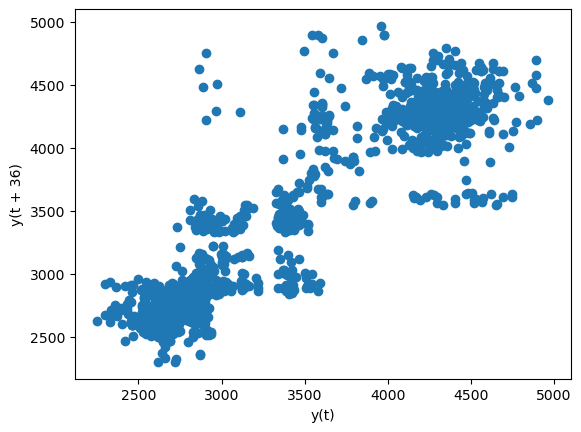

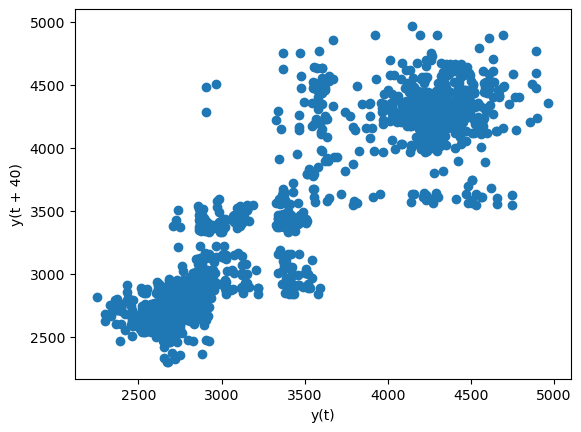

In [43]:
# Lag plot
plt.figure(figsize=(10,5))
for i in [1,4,8,12,16,20,24,28,32,36,40]:
    lag_plot(data.price,lag=i)
    plt.show()

In [44]:
data1 = df.copy()
data1=data1.resample('1M').mean()

In [45]:
data1

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000
...,...
2021-08-31,4264.919355
2021-09-30,4207.506667
2021-10-31,4289.148387


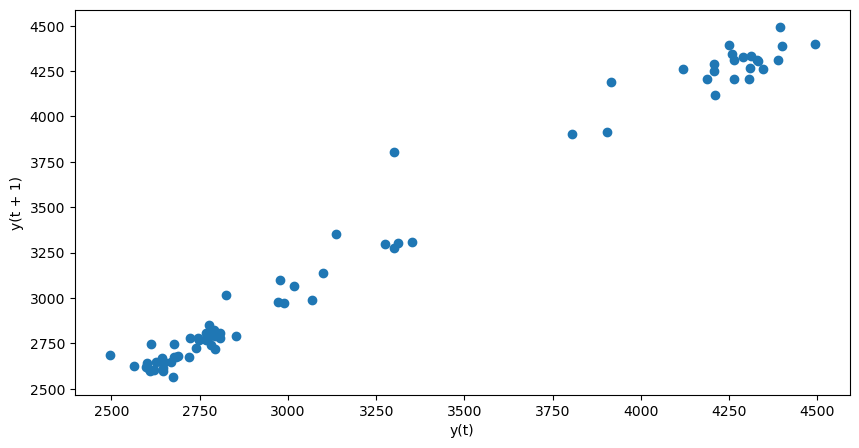

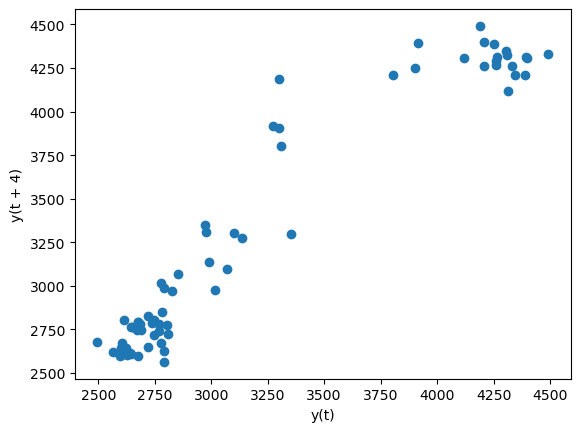

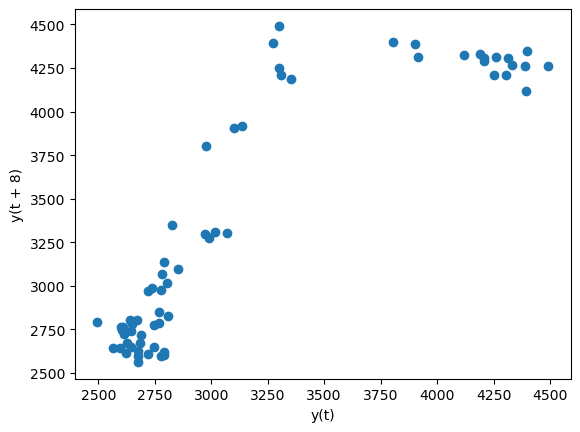

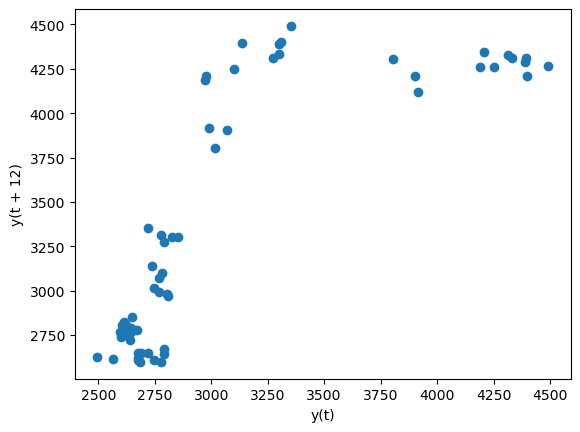

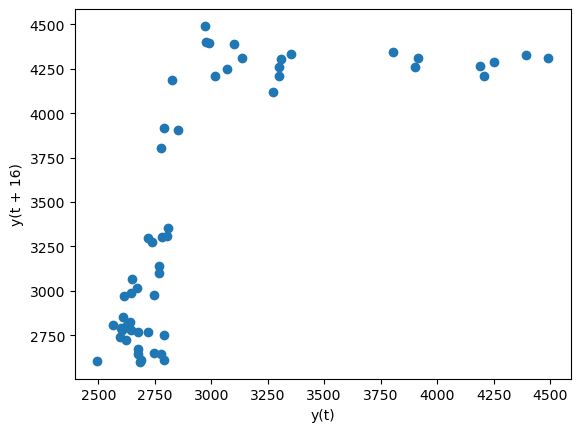

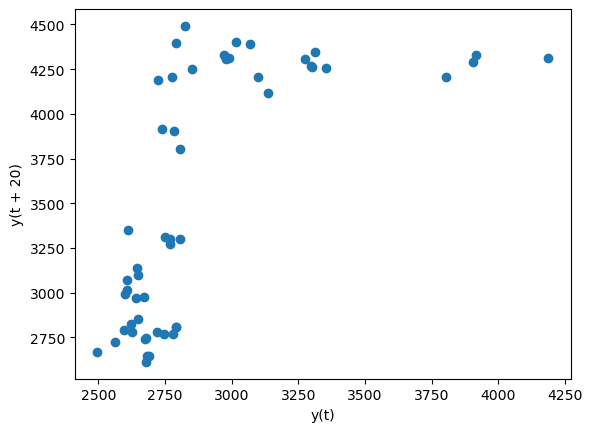

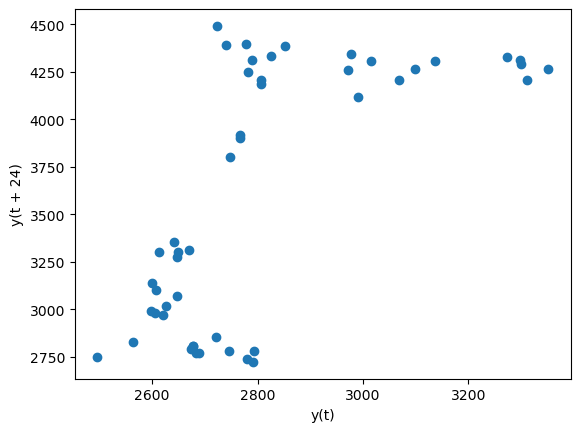

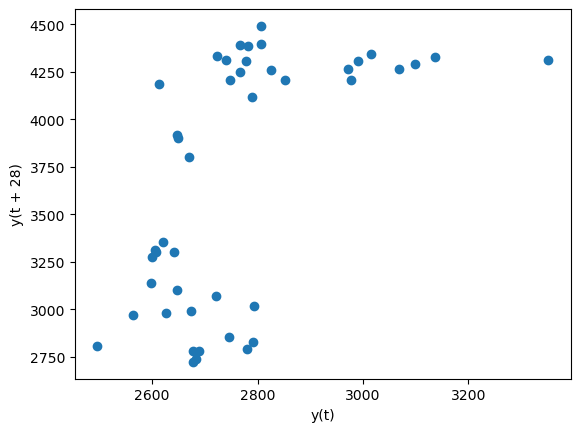

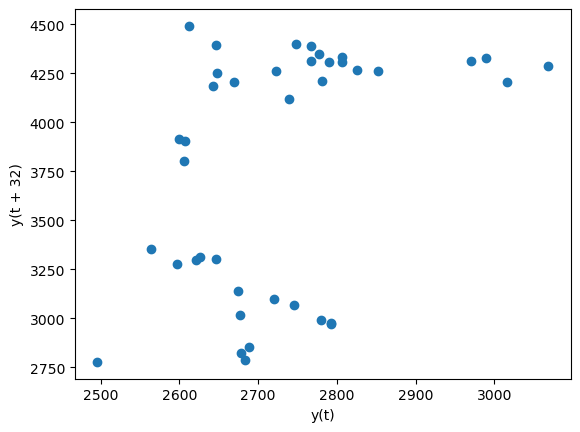

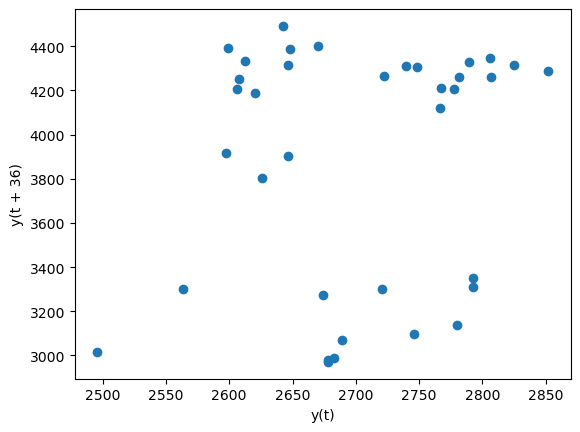

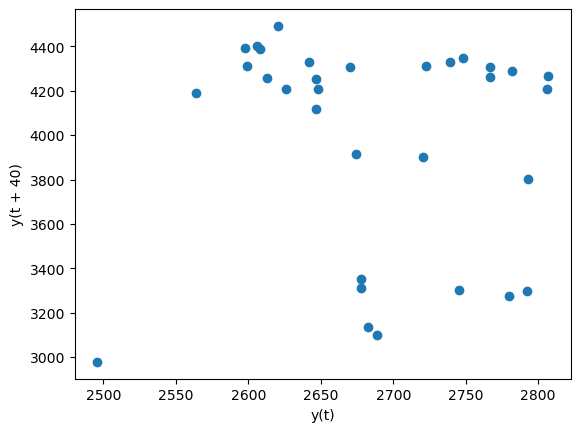

In [46]:
# Lag plot monthly
plt.figure(figsize=(10,5))
for i in [1,4,8,12,16,20,24,28,32,36,40]:
    lag_plot(data1.price,lag=i)
    plt.show()

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
# Perform seasonal decomposition (additive model for simplicity)
decomposition = seasonal_decompose(df, model='additive', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


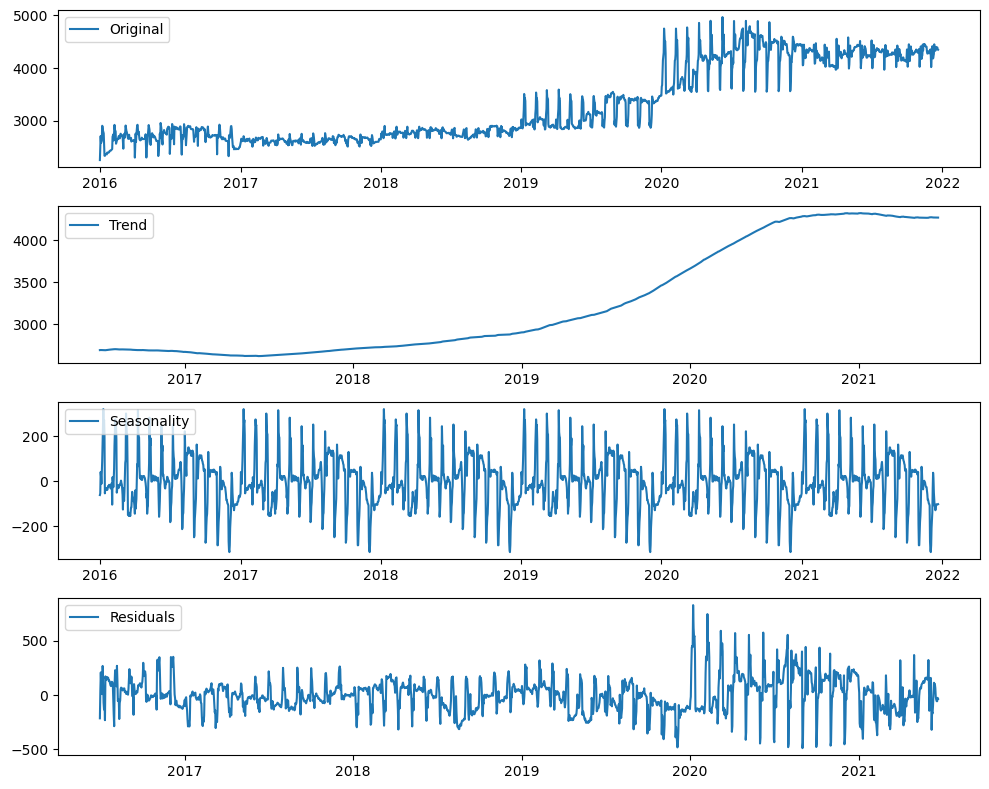

In [49]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [50]:
# Perform seasonal decomposition (multiplicative model for simplicity)
decomposition = seasonal_decompose(df, model='multiplicative', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


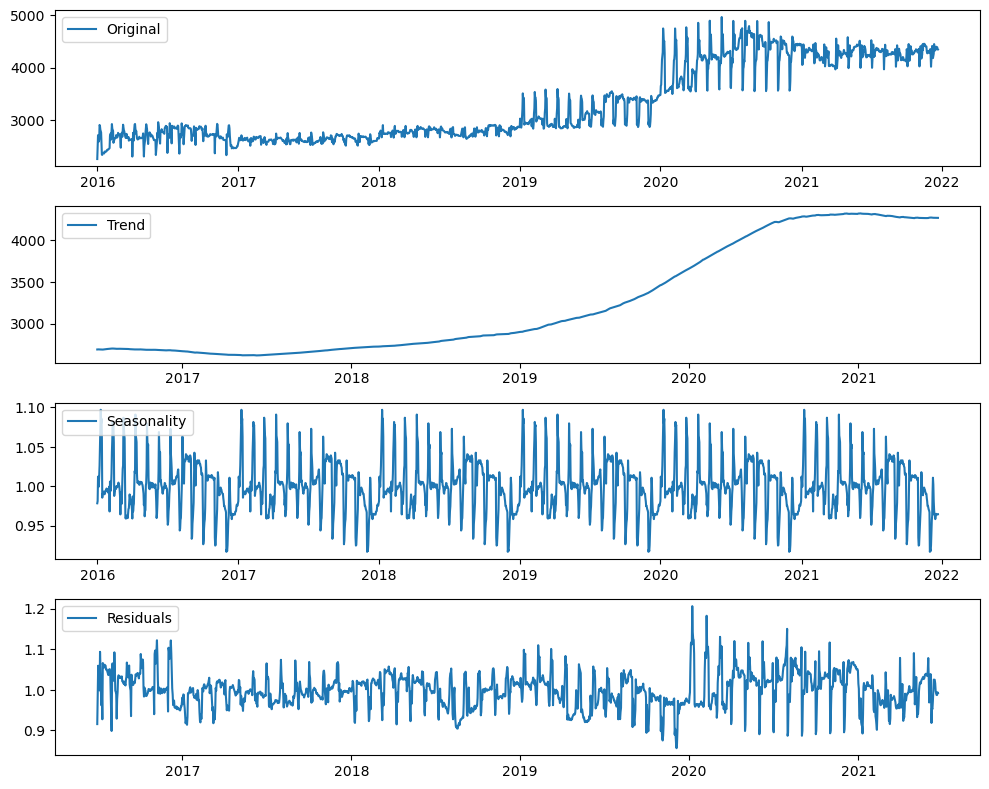

In [51]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

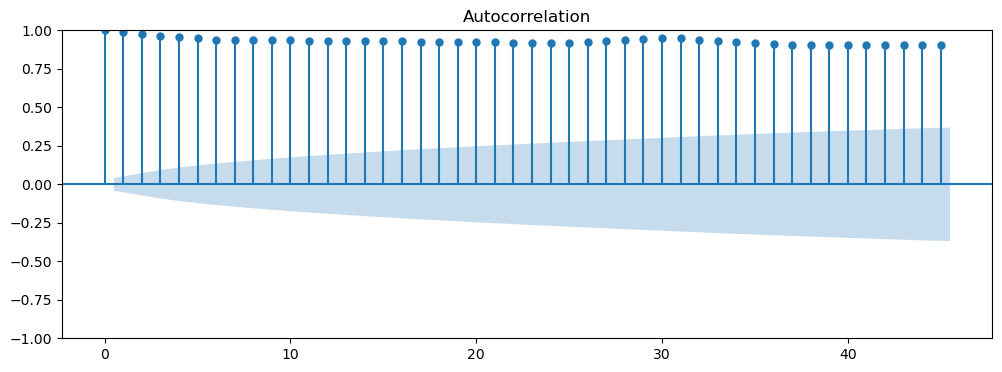

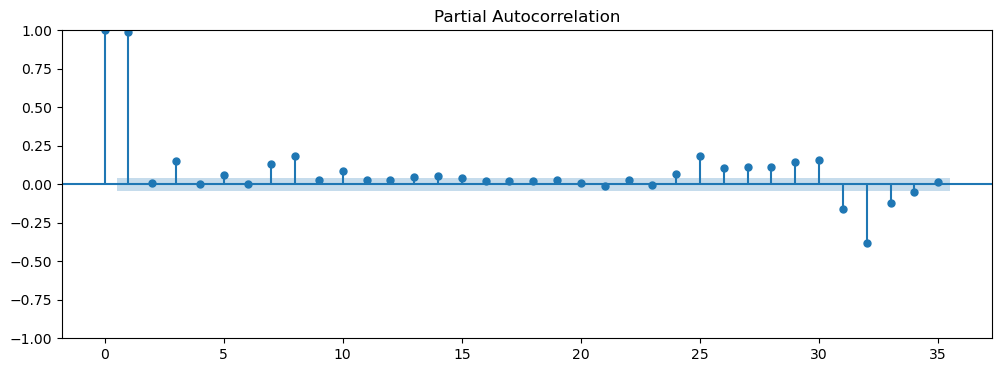

In [52]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.price,lags=45)
    tsa_plots.plot_pacf(df.price,lags=35)
    plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
adfuller(df['price'])[1]

0.9240899189079188

## The p value is greater than 0.5 , so the time series is non stationary

# Model Building

In [55]:
#!pip install pmdarima
from pmdarima import auto_arima


In [56]:
df_price = pd.DataFrame(df['price'],columns=['price'])
df_price

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [57]:
#Split the data
train = df_price.iloc[:-30]
test = df_price.iloc[-30:]

In [58]:
import statsmodels.api as sm

In [59]:
stepwise_fit = auto_arima(train.price, trace = True, suppress_warnings=True, seasonal=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26272.556, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26493.632, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26495.500, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26495.446, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26491.797, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26280.349, Time=1.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26284.116, Time=1.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26274.556, Time=1.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26274.556, Time=2.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26309.894, Time=0.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26277.948, Time=1.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26282.691, Time=1.83 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26261.952, Time=2.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26240.397, Time=2.72 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2152
Model:               SARIMAX(4, 1, 4)   Log Likelihood              -13097.252
Date:                Mon, 14 Oct 2024   AIC                          26212.503
Time:                        11:13:12   BIC                          26263.566
Sample:                    01-01-2016   HQIC                         26231.184
                         - 11-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2312      0.019     12.327      0.000       0.194       0.268
ar.L2          0.9656      0.018     54.916      0.000       0.931       1.000
ar.L3          0.4260      0.017     24.942      0.000       0.393       0.460
ar.L4         -0.7580      0.019    -40.562      0.000      -0.795      -0.721
ma.L1         -0.3418      0.019    -17.550      0.000      -0.380      -0.304
ma.L2         -1.1443      0.019    -59.802      0.000      -1.182      -1.107
ma.L3         -0.3608      0.019    -19.024      0.000      -0.398      -0.324
ma.L4          0.8762      0.018     48.737      0.000       0.841       0.911
sigma2      1.151e+04    142.809     80.629      0.000    1.12e+04    1.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):             41052.94
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                            -1.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
final_arima_model = sm.tsa.ARIMA(train['price'],order = (4,1,4))
arima_fit_final = final_arima_model.fit()


In [61]:
# forecast for next 30 days

forecast = arima_fit_final.predict(len(train), len(train)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['price']
forecast_df

,price
2021-11-22,4389.070456
2021-11-23,4356.329870
2021-11-24,4357.755529
2021-11-25,4336.460167
2021-11-26,4330.431961
2021-11-27,4333.898289
2021-11-28,4318.725318
2021-11-29,4332.137201
2021-11-30,4326.632516
2021-12-01,4329.218957


In [73]:
# ETS Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(train['price'], trend='add', seasonal='add', seasonal_periods=365)
ets_fit = ets_model.fit()

# Forecast for the next 30 days
ets_forecast = ets_fit.forecast(30)
ets_forecast_df = pd.DataFrame(ets_forecast, columns=['price'])
ets_forecast_df


,price
2021-11-22,4396.853926
2021-11-23,4393.436213
2021-11-24,4382.717201
2021-11-25,4393.123417
2021-11-26,4391.310431
2021-11-27,4389.709477
2021-11-28,4393.554054
2021-11-29,4392.901557
2021-11-30,4255.362199
2021-12-01,4268.989387


In [74]:
from prophet import Prophet

# Prepare the data
prophet_df = train.reset_index()[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast for the next 30 days
future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)
prophet_forecast[['ds', 'yhat']].tail(30)


11:14:16 - cmdstanpy - INFO - Chain [1] start processing
11:14:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
2152,2021-11-22,4180.888566
2153,2021-11-23,4176.736539
2154,2021-11-24,4170.660191
2155,2021-11-25,4164.600309
2156,2021-11-26,4152.271968
2157,2021-11-27,4148.348475
2158,2021-11-28,4137.669563
2159,2021-11-29,4130.424184
2160,2021-11-30,4123.832312
2161,2021-12-01,4116.011407


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create lag features (e.g., lag by 1, 2, 3 days)
df_lags = pd.DataFrame(train['price'])
df_lags['lag_1'] = df_lags['price'].shift(1)
df_lags['lag_2'] = df_lags['price'].shift(2)
df_lags['lag_3'] = df_lags['price'].shift(3)

# Drop rows with NaN values
df_lags.dropna(inplace=True)

# Prepare data for regression
X = df_lags[['lag_1', 'lag_2', 'lag_3']]
y = df_lags['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Linear Regression MAE: {lr_mae}, RMSE: {lr_rmse}')


Linear Regression MAE: 70.12136102077399, RMSE: 123.54647255464707


In [80]:
# Create lag features for the last observed data point
last_lag = [train['price'].iloc[-1], train['price'].iloc[-2], train['price'].iloc[-3]]

# Forecast for the next 30 days
forecast_lr = []
for i in range(30):
    next_pred = lr_model.predict([last_lag])[0]
    forecast_lr.append(next_pred)
    
    # Update lags
    last_lag = [next_pred] + last_lag[:-1]  # Update lags with the predicted value

# Convert forecast to DataFrame
forecast_lr_df = pd.DataFrame(forecast_lr, columns=['price'])
forecast_lr_df


,price
0,4384.810167
1,4365.083820
2,4347.827604
3,4330.870568
4,4313.897287
5,4297.151047
6,4280.663298
7,4264.402843
8,4248.362719
9,4232.543042


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Example: ARIMA Model Evaluation
arima_mae = mean_absolute_error(test['price'], forecast)
arima_rmse = np.sqrt(mean_squared_error(test['price'], forecast))

# Example: Regression Model Evaluation
regression_mae = mean_absolute_error(y_test, y_pred)
regression_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Example: ETS Model Evaluation
ets_mae = mean_absolute_error(test['price'], ets_forecast)
ets_rmse = np.sqrt(mean_squared_error(test['price'], ets_forecast))

# Example: Prophet Model Evaluation
prophet_forecast_final = prophet_forecast[['ds', 'yhat']].set_index('ds').tail(30)
prophet_mae = mean_absolute_error(test['price'], prophet_forecast_final['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(test['price'], prophet_forecast_final['yhat']))

# Print results
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')
print(f'Regression MAE: {regression_mae}, RMSE: {regression_rmse}')
print(f'ETS MAE: {ets_mae}, RMSE: {ets_rmse}')
print(f'Prophet MAE: {prophet_mae}, RMSE: {prophet_rmse}')

ARIMA MAE: 71.19009112721734, RMSE: 92.83697662936625
Regression MAE: 70.12136102077399, RMSE: 123.54647255464707
ETS MAE: 101.86361794190641, RMSE: 129.92233549482575
Prophet MAE: 203.5261859269572, RMSE: 218.48833517078083


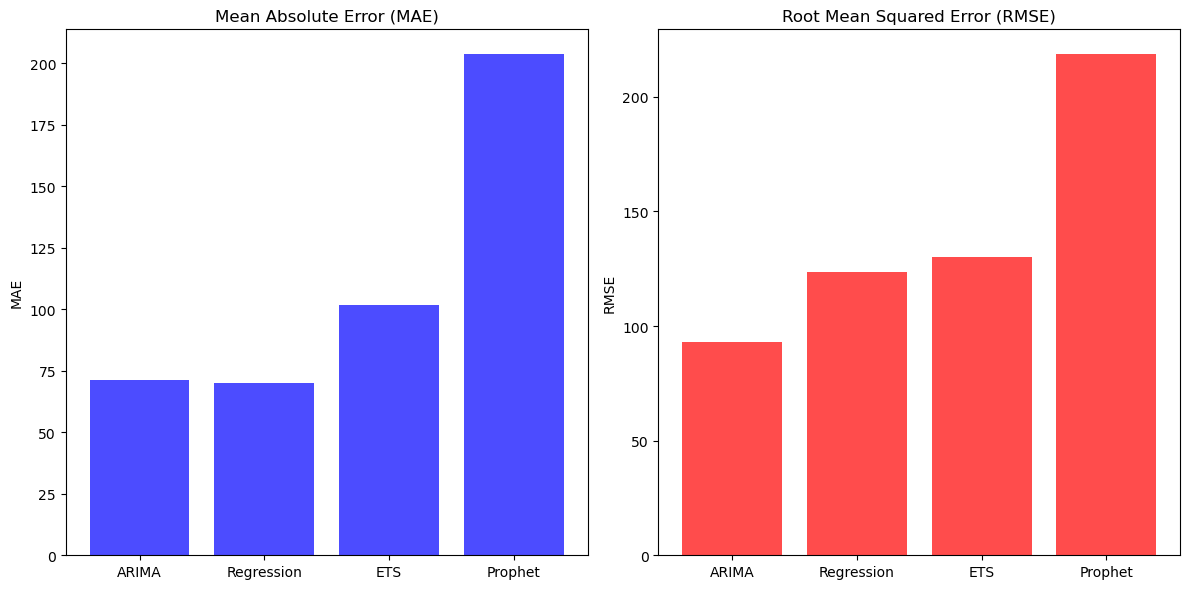

In [84]:
# Data for plotting
models = ['ARIMA', 'Regression', 'ETS', 'Prophet']
mae_values = [arima_mae, regression_mae, ets_mae, prophet_mae]
rmse_values = [arima_rmse, regression_rmse, ets_rmse, prophet_rmse]

# Plotting MAE
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.bar(models, mae_values, color='b', alpha=0.7)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Plotting RMSE
plt.subplot(1, 2, 2)
plt.bar(models, rmse_values, color='r', alpha=0.7)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# Show plot
plt.tight_layout()
plt.show()


# The best model is Arima , Regression is good in MAE but RMSE is worse than ARIMA

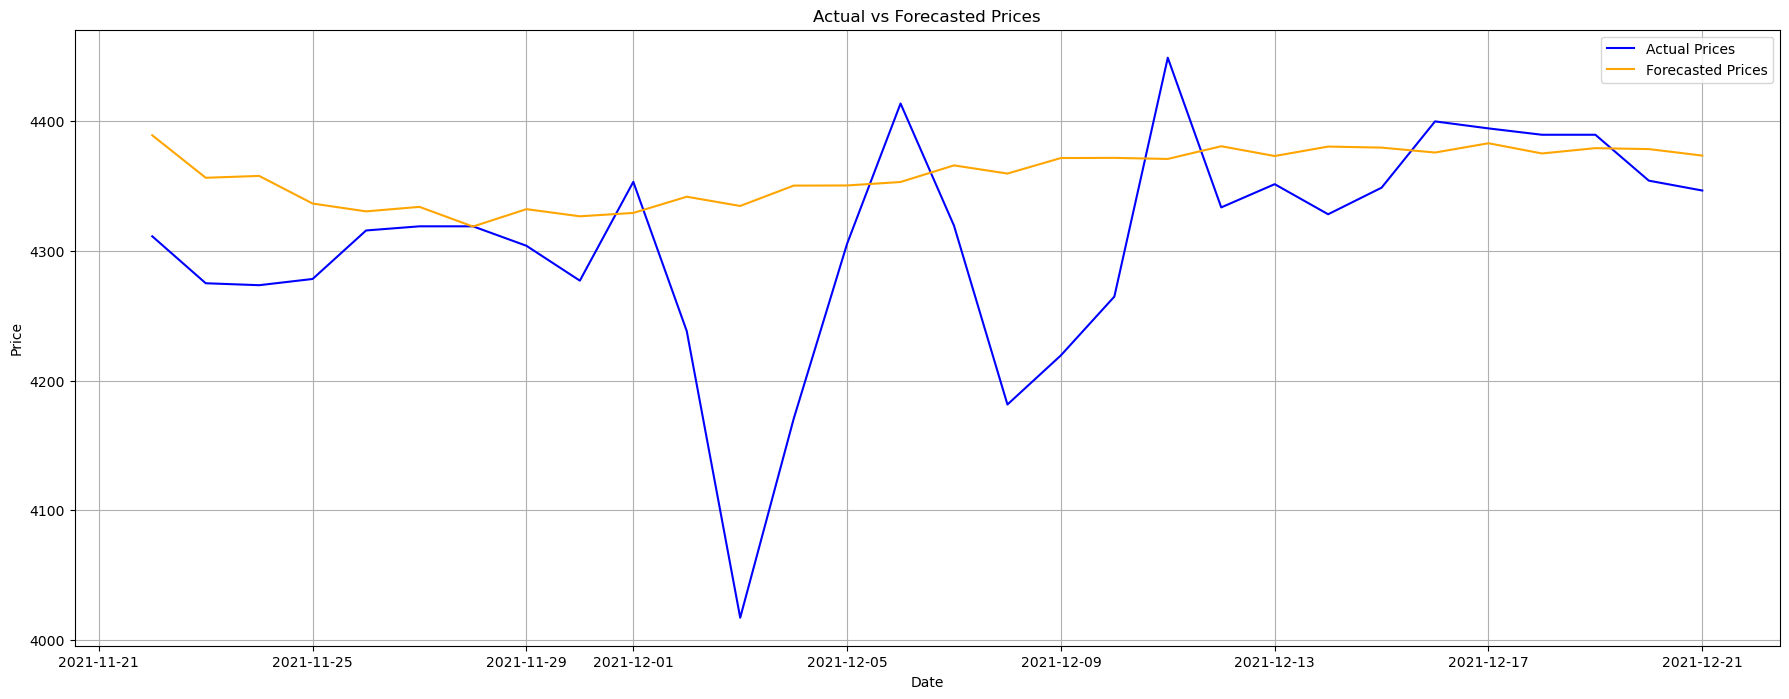

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting Actual vs Forecasted Prices
plt.figure(figsize=(22, 8))

# Use the index for the test DataFrame
plt.plot(test.index, test['price'], label='Actual Prices', color='blue')

# Generate forecast dates based on the last date in the train DataFrame
forecast_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot the forecasted values
plt.plot(forecast_dates, forecast_df['price'], label='Forecasted Prices', color='orange')

# Adding labels and title
plt.title('Actual vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [93]:
import numpy as np

# Assuming 'test' DataFrame contains actual prices and 'forecast_df' contains forecasted prices
# Aligning forecast_df to the test index
forecast_df.index = pd.date_range(start=test.index[0], periods=len(forecast_df), freq='D')

# Calculate Absolute Errors
absolute_errors = np.abs(test['price'] - forecast_df['price'])
#print(absolute_errors)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(absolute_errors)
#print(mae)

# Calculate Mean of Actual Values for Accuracy Calculation
mean_actual = np.mean(test['price'])
#print(mean_actual)

# Calculate Accuracy Percentage
accuracy_percentage = 100 - (mae / mean_actual * 100)

print(f'Accuracy: {accuracy_percentage:.2f}%')


Accuracy: 98.48%


In [65]:
stepwise_fit = auto_arima(df_price.price, trace = True, suppress_warnings=True, seasonal=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26623.835, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26849.714, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26851.587, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26851.536, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26847.869, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26631.605, Time=1.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26635.529, Time=1.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26625.835, Time=1.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26625.835, Time=2.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26662.140, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26629.134, Time=1.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26633.886, Time=1.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26613.890, Time=2.42 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26592.637, Time=2.79 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2182
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13266.706
Date:                Mon, 14 Oct 2024   AIC                          26557.412
Time:                        11:14:06   BIC                          26625.663
Sample:                    01-01-2016   HQIC                         26582.363
                         - 12-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4916      0.578      0.851      0.395      -0.641       1.624
ar.L1         -0.5053      0.020    -25.103      0.000      -0.545      -0.466
ar.L2         -0.5438      0.024    -23.114      0.000      -0.590      -0.498
ar.L3         -0.0510      0.029     -1.753      0.080      -0.108       0.006
ar.L4          0.0420      0.022      1.898      0.058      -0.001       0.085
ar.L5          0.7628      0.018     43.526      0.000       0.728       0.797
ma.L1          0.3538      0.016     22.025      0.000       0.322       0.385
ma.L2          0.2726      0.017     16.276      0.000       0.240       0.305
ma.L3         -0.2280      0.017    -13.313      0.000      -0.262      -0.194
ma.L4         -0.2962      0.015    -19.773      0.000      -0.326      -0.267
ma.L5         -0.9167      0.013    -72.242      0.000      -0.942      -0.892
sigma2       1.19e+04    183.231     64.946      0.000    1.15e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                  11.26   Jarque-Bera (JB):             37021.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                            -1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
final_arima_model = sm.tsa.ARIMA(df_price['price'],order = (5,1,5))
arima_fit_final = final_arima_model.fit()


In [67]:
# forecast for next 30 days

forecast = arima_fit_final.predict(len(df_price), len(df_price)+29)
forecast_df2 = pd.DataFrame(forecast)
forecast_df2.columns = ['price']
forecast_df2

,price
2021-12-22,4379.041780
2021-12-23,4364.370758
2021-12-24,4369.225463
2021-12-25,4355.919047
2021-12-26,4307.184328
2021-12-27,4364.195344
2021-12-28,4349.587289
2021-12-29,4332.209436
2021-12-30,4334.207238
2021-12-31,4307.561599


In [68]:
# Set appropriate date as index for plotting forecast data

datetime = pd.date_range('2021-12-22', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['date'])

data_forecast = forecast_df2.set_index(date_df.date)
data_forecast

,price
date,
2021-12-22,4379.041780
2021-12-23,4364.370758
2021-12-24,4369.225463
2021-12-27,4355.919047
2021-12-28,4307.184328
2021-12-29,4364.195344
2021-12-30,4349.587289
2021-12-31,4332.209436
2022-01-03,4334.207238


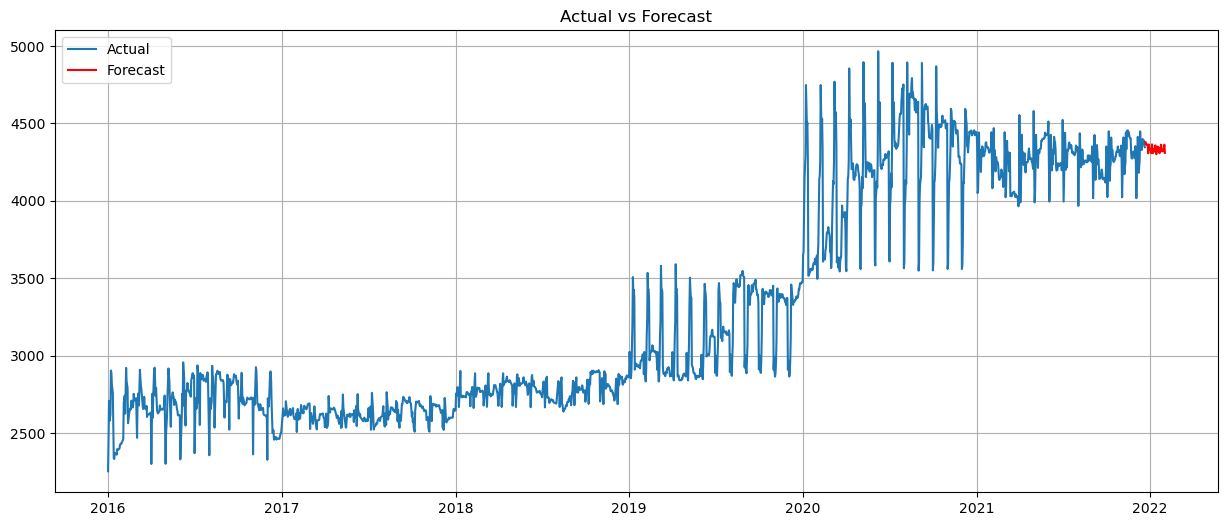

In [69]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(df_price, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

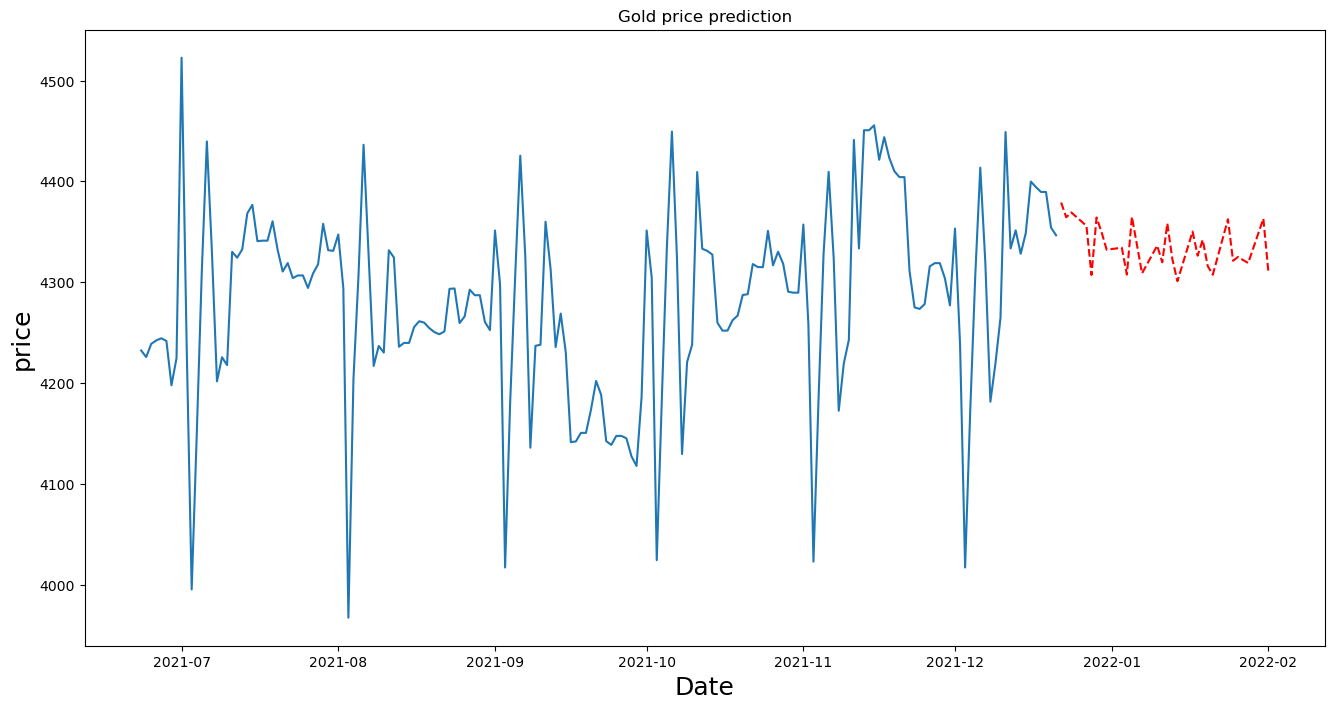

In [70]:
plt.figure(figsize=(16,8))
plt.title('Gold price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price' ,fontsize=18)
plt.plot(df['price'][2000:])
plt.plot(data_forecast[['price']],"r--")

In [85]:
from pickle import dump

In [86]:
dump(arima_fit_final,open('arima_fit_final.sav','wb'))

In [87]:
dump(df_price,open('df_price.sav','wb'))
dump(datetime,open('datetime.sav','wb'))

In [88]:
print(forecast)


2021-12-22    4379.041780
2021-12-23    4364.370758
2021-12-24    4369.225463
2021-12-25    4355.919047
2021-12-26    4307.184328
2021-12-27    4364.195344
2021-12-28    4349.587289
2021-12-29    4332.209436
2021-12-30    4334.207238
2021-12-31    4307.561599
2022-01-01    4364.862789
2022-01-02    4336.833253
2022-01-03    4308.775275
2022-01-04    4336.327729
2022-01-05    4319.734889
2022-01-06    4358.311247
2022-01-07    4322.775758
2022-01-08    4300.960973
2022-01-09    4350.320678
2022-01-10    4326.330079
2022-01-11    4342.058809
2022-01-12    4315.921344
2022-01-13    4307.422087
2022-01-14    4362.423111
2022-01-15    4321.282546
2022-01-16    4325.071946
2022-01-17    4321.927766
2022-01-18    4319.052391
2022-01-19    4363.055143
2022-01-20    4309.869410
Freq: D, Name: predicted_mean, dtype: float64


In [89]:
datetime

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-31', '2022-02-01'],
              dtype='datetime64[ns]', freq='B')